In [35]:
import cv2
from imutils.video import FileVideoStream
from imutils.video import FPS
import matplotlib.pyplot as plt
import json
import os

In [9]:
def plot_img(img, show_by_cv = False):
    if not show_by_cv:
        fig=plt.figure(figsize=(10, 8))
        _img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(_img)
        plt.show()
    else:
        cv2.imshow("img", img)

In [7]:
file = open("/home/mohamad/MasterThesis/AlphaPose/examples/res/alphapose-results.json", 'r')
content  = file.read()
deser = json.loads(content)

In [12]:
bboxes = [obj['box'] for obj in deser]
bboxes

[[388.942626953125, 149.39144897460938, 96.20501708984375, 184.67001342773438],
 [323.3092346191406, 131.89195251464844, 83.05990600585938, 208.8736114501953],
 [789.624267578125, 144.2997589111328, 74.19012451171875, 216.4491424560547],
 [574.3154296875, 148.00587463378906, 22.581787109375, 53.44721984863281],
 [517.8322143554688, 138.65728759765625, 21.92095947265625, 75.471923828125],
 [730.6292114257812,
  152.14141845703125,
  75.66253662109375,
  213.87899780273438],
 [942.6171875, 151.92572021484375, 90.6031494140625, 216.8948974609375],
 [543.572265625, 145.45538330078125, 20.3504638671875, 52.43254089355469],
 [503.3054504394531,
  142.51951599121094,
  14.887969970703125,
  39.62580871582031],
 [482.46405029296875, 142.97900390625, 13.535980224609375, 37.53486633300781],
 [321.3677673339844, 142.2346954345703, 15.70343017578125, 34.87109375],
 [262.1524963378906, 153.26023864746094, 14.4820556640625, 20.86920166015625],
 [533.2647705078125, 161.38710021972656, 10.261474609375

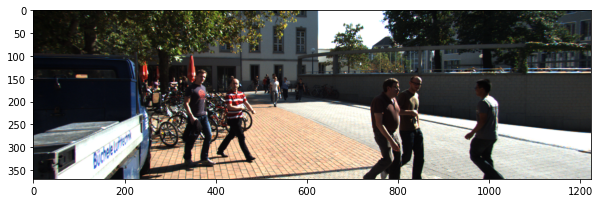

In [18]:
img = cv2.imread('/home/mohamad/Kitti_tracking/data_tracking_image_2/training/image_02/0017/000024.png')
plot_img(img)

In [28]:
def crop(img, bboxes):
    cropped_imgs = []
    for bbox in bboxes:
        bbox = [int(round(x)) for x in bbox]
        cropped = img[bbox[1]:bbox[1] + bbox[3], bbox[0]:bbox[0] + bbox[2]]
        cropped_imgs.append(cropped)
    return cropped_imgs

In [36]:
def crop_and_save(img, bboxes, base_path):
    cropped_imgs = crop(img, bboxes)
    os.mkdir(base_path)
    cnt = 0
    for cropped_img in cropped_imgs:
        path = f"{base_path}/{cnt}.jpg"
        print(path)
        cv2.imwrite(path, cropped_img)
        cnt += 1

In [37]:
crop_and_save(img, bboxes, "cropped")

cropped/0.jpg
cropped/1.jpg
cropped/2.jpg
cropped/3.jpg
cropped/4.jpg
cropped/5.jpg
cropped/6.jpg
cropped/7.jpg
cropped/8.jpg
cropped/9.jpg
cropped/10.jpg
cropped/11.jpg
cropped/12.jpg
